# Расчетное задание 1

## Идентификация сообщений, передаваемых по зашумленному каналу связи

### Часть 1. Последовательная передача одинаковых сообщений

#### 1.1. Определение переданного сообщения

##### Исходный алфавит

In [1]:
alphabet = {}
with open('alphabet.txt', encoding='utf8') as f:
    content = f.readlines()
    content = [x.rstrip().split('\t') for x in content]
    for pair in content:
        alphabet[pair[0]] = pair[1]
    print(alphabet)


{'у': '0111111', '6': '0000110', 'Т': '0011101', '№': '1010011', 'ь': '1000110', '4': '0000100', '9': '0001001', '1': '0000001', 'л': '0110111', 'Д': '0001110', 'Н': '0011000', 'И': '0010011', 'в': '0101101', '7': '0000111', 'О': '0011001', 'Ч': '0100010', 'Я': '0101010', 'ы': '1000111', 'ю': '1001010', ' ': '1010110', '(': '1010100', 'Р': '0011011', 'е': '0110000', 'А': '0001010', 'ч': '1000011', 'Ю': '0101001', 'Ц': '0100001', 'г': '0101110', '!': '1001110', 'С': '0011100', 'У': '0011110', ')': '1010101', 'Б': '0001011', 'З': '0010010', 'а': '0101011', 'п': '0111011', 'ж': '0110010', 'Е': '0001111', 'ш': '1000100', 'В': '0001100', 'б': '0101100', '-': '1010001', 'и': '0110100', 'Ё': '0010000', 'к': '0110110', 'Э': '0101000', 'Ф': '0011111', 'Ж': '0010001', 'П': '0011010', 'Ъ': '0100111', 'Х': '0100000', '5': '0000101', '_': '1010010', 'К': '0010101', 'з': '0110011', '3': '0000011', 'т': '0111110', 'ф': '1000000', 'Ы': '0100110', 'ъ': '1001000', 'э': '1001001', 'Щ': '0100100', 'м': '0

In [2]:
def get_char(code: str):
    """Найти символ по его двоичному коду"""
    for key, value in alphabet.items():
        if value == code:
            return key


In [3]:
def get_sorted_keys():
    """Получить алфавит, отсортерованный по двоичному коду символов"""
    sorted_values = sorted(alphabet.values())
    sorted_keys = []
    for value in sorted_values:
        sorted_keys.append(get_char(value))
    return sorted_keys


Словарь априорных вероятностей:

In [4]:
priori = alphabet.copy()
n = len(alphabet)
p = 1 / n
for key, value in priori.items():
    priori[key] = p


Функция, находящая максимальное значение в словаре

In [5]:
def find_max(d: dict):
    """Найти в словаре ключ с максимальным значением"""
    return max(d, key=d.get)


##### Входные данные

In [6]:
with open('input.txt', encoding='utf8') as f:
    content = f.readlines()


Колличество букв в каждом сообщении равно $s$:

In [7]:
s = int(content[0].split(': ')[1])
print('s = {s}'.format(s=s))


s = 222


Вероятность искажения каждого отдельного символа (бита) равна $q$, вероятность правильной передачи $p = 1 - q$:

In [8]:
q = float(content[2].split(': ')[1])
p = 1 - q
print('p = {p}, q = {q}'.format(p=p, q=q))


p = 0.832, q = 0.168


Колличествно сообщений (посылок) равно $m$:

In [9]:
m = int(content[3].split(': ')[1])
print('m = {m}'.format(m=m))


m = 18


In [10]:
def find_prob(x, y):
    """Найти вероятность p(y|x)"""
    assert len(x) == len(y)
    prob = 1
    for i in range(len(x)):
        prob = prob * (p if x[i] == y[i] else q)
    return prob


In [11]:
def find_message_prob(x: dict, x_when_y: dict):
    """Найти вероятность p(y)"""
    total = 0
    for char in x_when_y.keys():
        total = total + x_when_y[char] * x[char]
    return total


In [12]:
def find_posterior_probs(x: dict, y: str):
    """Найти вероятность p(x|y)"""
    x_when_y = alphabet.copy()
    for char in x_when_y.keys():
        x_when_y[char] = find_prob(alphabet[char], y)
    
    prob_y = find_message_prob(x, x_when_y)
    
    x_post = x.copy()
    for char in x.keys():
        x_post[char] = x_when_y[char] * x[char] / prob_y
        
    return x_post

In [13]:
import math

def find_entropy(x: dict):
    """Найти энтропию H(X)"""
    res = 0
    for key, value in x.items():
        res = res + value * math.log2(value)
    return -res


In [14]:
def find_cond_entropy(x: dict, y: str):
    """Найти условную энтропию H(X|y)"""
    x_when_y = find_posterior_probs(x, y)
    res = 0
    for key, value in x.items():
        res = res + x_when_y[key] * math.log2(x_when_y[key])
    return -res


In [15]:
def find_avg_entropy(x: dict, y: list):
    """Найти среднюю условную энтропию H(X|Y)"""
    res = 0
    for yi in y:
        x_when_y = find_posterior_probs(x, yi)
        res = res + find_message_prob(x, x_when_y) * find_cond_entropy(x, yi)
    return res
    

In [16]:
def find_info(x: dict, y: str):
    """Найти количество информации об x I(X|y)"""
    summ = 0
    for char in x.keys():
        summ = summ + find_prob(alphabet[char], y) * math.log2(x[char])
    return -summ - find_cond_entropy(x, y)


In [17]:
def find_avg_info(x: dict, y: list):
    """Найти среднее количество информации об x H(X|Y)"""
    res = 0
    for yi in y:
        x_when_y = find_posterior_probs(x, yi)
        res = res + find_message_prob(x, x_when_y) * find_info(x, yi)
    return res

##### Все символы равновероятны

In [18]:
messages = []

for i in range(m):
    codes = content[i + 4].split(': ')[1].rstrip().split(' ')
    messages.append(codes)


In [19]:
chars = []  # вероятности появления каждого j-ого символа после i-ого сообщения
entropies = []  # значения энтропий каждого j-ого символа после i-ого сообщения
infos = []  # значения кол-ва информации об j-ом символе после i-ого сообщения

char_array = []  # инициализируем априорными вероятностями
for j in range(s):
    char = priori.copy()
    char_array.append(char)
chars.append(char_array)

for i in range(m):  # для каждого сообщения

    entropies_array = []
    info_array = []

    for j in range(s):  # для каждой буквы в сообщении
        entropies_array.append(find_entropy(chars[i][j]))
        info_array.append(find_info(chars[i][j], messages[i][j]))
        chars[i][j] = find_posterior_probs(chars[i][j], messages[i][j])

    entropies.append(entropies_array)
    infos.append(info_array)

    if i != m - 1:  # априорное для следующего = постериорное для текущего
        char_array = []
        for j in range(s):
            char = chars[i][j].copy()
            char_array.append(char)
        chars.append(char_array)


In [20]:
for i in range(m):
    print(i + 1, end=': ')
    for j in range(s):
        max_char = find_max(chars[i][j])
        print(max_char, end='')
    print()


1: 8:ЛДьэчимв 4зГЩрТюизьдпПзж:ж235ц1Ё Т вжчННжпк вкБНпыпЯлдчт_заяит пЯ гХНоиб(вевЯчтЮосйиёцуЗНитЩтисШ СирелЬаМр3чЦТзШЬо,тча. Ял!ЛФтжгЯ(ЯоюсебмеЯТ! проСйшат6(ЦУЙ РммвкеифКо ззЬа:и(й?ннелЯр. А№Ч(рЯсяЁрн7х кадаёж2!кА(и3елаю эдЗ.
2: бэ Я6эчинв 4пТХмчьиз6гНУЗзы_З35ю9Зь:ЛвгШмУжпжьвлЯма6пЯзу№У жЯ!итьпг№гЭмриЩ вЧбЯ№УЭаТкеёЙуЗНег4кисЮ )имеллп6ТчыеТЖавЯ,мчБш Ал! :ЫмДЯ(ппУсебпиЯс! проСе4ать(фДЗ ОННбтеишин(зЗЬаыи(л ОуелЧть АчЦ(бЯТчетн3х еадЯЭеА!тЭ(сБЧлаю эгЗ,
3: г, ДьэчЛмв 4ауЩм, изшгттпз:_23Ьъ5Зь, вЧШмжжно вкорпьпЯлучт жачет по№геориЩьвжрЯятнойтеЖ уЛЗеЫЩтисЮ (имикла рБяЦсзаво,ича. Азя ,тоДо потрертегс: пробе4ать хти птмвтейфй? зРдпчи к(суелЯть 2-ШЛрЯсчетн7х жадЮния. Я(сБжлаю ,дП.
4: гГ Дьячков 4адЩм: из гртпз:_Ч35ъ4З6, вжамжжуо влорп полу№у жачетьпг теориЩьЮжрЯятносуеЖ уЛЗикЩтинЮ )ирилла СБяХславо,ица. Аля этого потребуегсюьпрпбешать(хуи птмстейши? зБЫачи к суелЯть 2-ШЛрЯТчетныщ завЮния. Я(сажлаю ,уПД
5: г, ДьячЛов 4ауим, из гттпз: 23Ь81_6, вжамжжно вкоро получу зачет по теорииьЮжроятнойтеК у Пик

In [21]:
import matplotlib.pyplot as plt
from matplotlib import rc

font = {'family': 'Arial', 'weight': 'normal'}
rc('font', **font)

for i in range(m):  # для каждого сообщения
    char_num = 7
    curr = chars[i][char_num]

    sorted_keys = get_sorted_keys()
    sorted_values = []
    for key in sorted_keys:
        sorted_values.append(curr[key])

    fig = plt.figure(figsize=(11, 7))
    plt.bar(range(len(alphabet)), sorted_values, align='center')
    plt.xticks(range(len(curr)), sorted_keys)
    plt.xlabel('$x$', fontsize=20, labelpad=20)
    plt.ylabel('$P(x)$', fontsize=20, labelpad=20)
    plt.tick_params(labelsize=9, pad=10)
    plt.title('Распределение вероятностей {0}-ой буквы сообщения после {1}-ой посылки'.format(char_num, i + 1), fontsize=15)
    plt.tight_layout()
    plt.xlim([0, len(curr)])
    plt.ylim([0, 1])
    plt.tight_layout()
    #plt.savefig('./pics/uniform{i}.png'.format(i=i+1))
    #plt.show()
    plt.close(fig)


##### Вероятности задаются исходя из частоты встречания букв в русском языке

In [22]:
with open('frequencies.txt', encoding='utf8') as f:
    content = f.readlines()
    frequncies = {}
    content = [x.rstrip().split('\t') for x in content] 
    for pair in content:
        frequncies[pair[0]] = float(pair[1])
        
print(frequncies)


{'у': 2.9, 'х': 0.92, 'ч': 1.27, 'ф': 0.4, 'и': 7.45, 'г': 1.41, 'п': 3.35, 'щ': 0.49, 'а': 8.66, 'ш': 0.77, 'о': 9.28, 'з': 1.81, 'ь': 1.9, 'л': 4.32, 'ц': 0.52, 'т': 6.3, 'д': 2.56, 'с': 5.45, 'в': 4.19, 'ж': 0.78, 'й': 1.31, 'ё': 0.14, 'ъ': 0.04, 'э': 0.17, 'б': 1.51, 'ы': 2.11, 'м': 3.29, 'я': 2.22, 'н': 6.35, 'ю': 1.03, 'е': 8.1, 'р': 5.53, 'к': 3.47}


In [23]:
def get_frequency(char: str):
    assert len(char) == 1
    char = char.lower()
    if char in frequncies.keys():
        return len(frequncies) * priori[char] * frequncies[char] / sum(frequncies.values())
    else:
        return priori[char]


In [24]:
priori_weight = priori.copy()
for key in priori_weight.keys():
    priori_weight[key] = get_frequency(key)
    
print(priori_weight)
print('Sum = ' + str(sum(priori_weight.values())))


{'у': 0.010999999999999998, '6': 0.011494252873563218, 'Т': 0.023896551724137925, '№': 0.011494252873563218, 'ь': 0.007206896551724136, '4': 0.011494252873563218, '9': 0.011494252873563218, '1': 0.011494252873563218, 'л': 0.016386206896551722, 'Д': 0.009710344827586205, 'Н': 0.024086206896551717, 'И': 0.028258620689655168, 'в': 0.01589310344827586, '7': 0.011494252873563218, 'О': 0.03519999999999999, 'Ч': 0.004817241379310344, 'Я': 0.008420689655172413, 'ы': 0.008003448275862067, ' ': 0.011494252873563218, '(': 0.011494252873563218, 'Р': 0.020975862068965512, 'е': 0.030724137931034474, 'А': 0.03284827586206896, 'ч': 0.004817241379310344, 'Ю': 0.003906896551724137, 'Ц': 0.001972413793103448, 'г': 0.005348275862068964, '!': 0.011494252873563218, 'С': 0.02067241379310344, 'У': 0.010999999999999998, 'Б': 0.00572758620689655, 'З': 0.006865517241379309, 'а': 0.03284827586206896, 'п': 0.012706896551724137, 'ж': 0.0029586206896551723, 'Е': 0.030724137931034474, 'ш': 0.0029206896551724135, 'ю':

In [25]:
chars_weight = []  # вероятности появления каждого j-ого символа после i-ого сообщения
entropies_weight = []  # значения энтропий каждого j-ого символа после i-ого сообщения
infos_weight = []  # значения кол-ва информации об j-ом символе после i-ого сообщения

char_array = []  # инициализируем априорными вероятностями
for j in range(s):
    char = priori_weight.copy()
    char_array.append(char)
chars_weight.append(char_array)

for i in range(m):  # для каждого сообщения

    entropies_array = []
    info_array = []

    for j in range(s):  # для каждой буквы в сообщении
        entropies_array.append(find_entropy(chars_weight[i][j]))
        info_array.append(find_info(chars_weight[i][j], messages[i][j]))
        chars_weight[i][j] = find_posterior_probs(chars_weight[i][j], messages[i][j])

    entropies_weight.append(entropies_array)
    infos_weight.append(info_array)

    if i != m - 1:  # априорное для следующего = постериорное для текущего
        char_array = []
        for j in range(s):
            char = chars_weight[i][j].copy()
            char_array.append(char)
        chars_weight.append(char_array)


In [26]:
for i in range(m):
    print(i + 1, end=': ')
    for j in range(s):
        max_char = find_max(chars_weight[i][j])
        print(max_char, end='')
    print()


1: 8:ЛДь9чимв 4зЕирТПизьдпПзо:_235_1е Т воаНН_пк вкАНпыпЯлдчт_заяит пЯ геНоиб(вевЯчтаосиие_уЗНититиса СирелЬаМр3ч1ТзаЬо,тча. Ял!Л:тогЯ(ЯоПсебмеЯТ! проСииат6(хУикРммвкеи0Ко ззЬа:и(и?ннелЯр. А№Ч(рЯсяерн7х када-_2!кА(и3елаА 9дЗ.
2: А:ЛА6э3инв ВаЕХр)_изЛдОоозЕ_275А9_ :ЛвоШНо_но виоНаАпАлл№т за!ет по№теооии вето№тноТЕеЖИуЛНетиоиса )иреллаЛТ3:еТИаво,очаВ Ал!Л:тоДо ооореиоеоТ! проре4ат! -текОоовтеи.ио зова:и иеОоелЯт! А-еЛрЯТяетнИх еадАееА!та и3елаю ,тП,
3: !, Дь,чЛмв 4ауим, изшгттпз:_23Ь85Зь, вЧаможно вкорпьпЯлучт еачет по№георииьверЯятнойтеЖМуЛЗеЫитиса (имикла рЕяЦсзавовича. Азя ,тоДо потрертегс: пробе4ать хти птмвтеифие зРдпчи к(суелЯть 2-ШЛрЯсчетн7х оадания. Я(саелаю ,дП.
4: гЕ(Д!ячЛов Вауим: ил Ыттпз:_23584_6, вЧамжжно влоро полу№т зачет по теории вероятностеК уЛПекЩтина Кирилла ряяХсИавовича, АляЛ,тоДо потреитетс! проте4ат6 хти птостейшие задачи и(сселАть 2-3ЛраТчетн7х завания. а саелаю ,тПВ
5: г, ДьячЛов 4ауим, из гттпз: 23Ь81_6, воаможно вкоро получу зачет по теорииьЮероятнойтеК у Пик

In [27]:
for i in range(m):  # для каждого сообщения
    char_num = 7
    curr = chars_weight[i][char_num]

    sorted_keys = get_sorted_keys()
    sorted_values = []
    for key in sorted_keys:
        sorted_values.append(curr[key])

    fig = plt.figure(figsize=(11, 7))
    plt.bar(range(len(alphabet)), sorted_values, align='center')
    plt.xticks(range(len(curr)), sorted_keys)
    plt.xlabel('$x$', fontsize=20, labelpad=20)
    plt.ylabel('$P(x)$', fontsize=20, labelpad=20)
    plt.tick_params(labelsize=9, pad=10)
    plt.title('Распределение вероятностей {0}-ой буквы сообщения после {1}-ой посылки'.format(char_num, i + 1), fontsize=15)
    plt.tight_layout()
    plt.xlim([0, len(curr)])
    plt.ylim([0, 1])
    plt.tight_layout()
    #plt.savefig('./pics/weight{i}.png'.format(i=i+1))
    #plt.show()
    plt.close(fig)


Из результатов видно, что в ситуации, когда вероятности задаются ихсодя из частоты встречания букв в русском языке, зашумленное сообщение было распознано немного быстрее.

#### 1.2. Расчет энтропии и количества информации

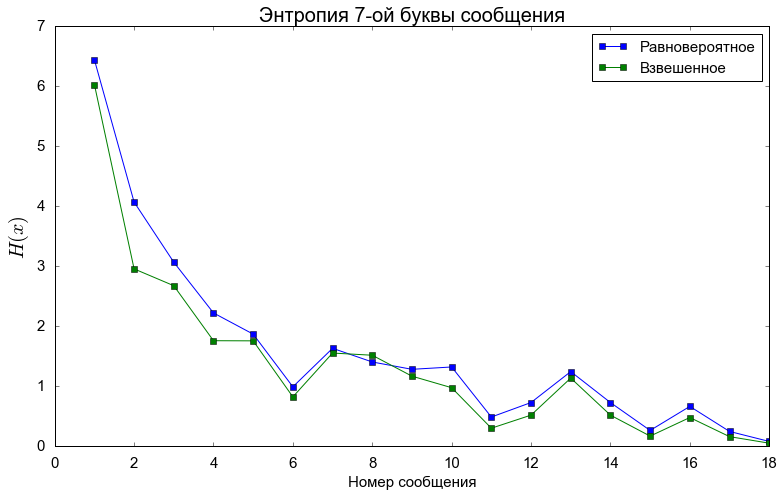

In [28]:
x = range(1, m+1)
h_u = []
h_w = []

for i in range(m):
    char_num = 7
    h_u.append(entropies[i][char_num])
    h_w.append(entropies_weight[i][char_num])
    
fig = plt.figure(figsize=(11,7))
plt.plot(x, h_u, marker='s', label='Равновероятное')
plt.plot(x, h_w, marker='s', label='Взвешенное')
plt.legend(fontsize=15)
plt.xlabel('Номер сообщения', fontsize=15)
plt.ylabel('$H(x)$', fontsize=20)
plt.tick_params(labelsize=15, pad=10)
plt.title('Энтропия {0}-ой буквы сообщения'.format(char_num, i + 1), fontsize=20)
plt.tight_layout()
#plt.savefig('./pics/entropy.png')
plt.show()
plt.close()


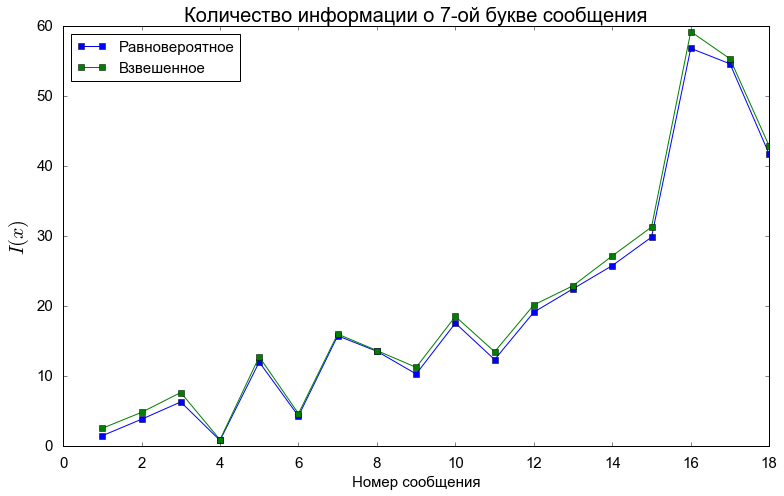

In [29]:
x = range(1, m+1)
i_u = []
i_w = []

for i in range(m):
    char_num = 7
    i_u.append(infos[i][char_num])
    i_w.append(infos_weight[i][char_num])
    
fig = plt.figure(figsize=(11,7))
plt.plot(x, i_u, marker='s', label='Равновероятное')
plt.plot(x, i_w, marker='s', label='Взвешенное')
plt.legend(fontsize=15, loc='upper left')
plt.xlabel('Номер сообщения', fontsize=15)
plt.ylabel('$I(x)$', fontsize=20)
plt.tick_params(labelsize=15, pad=10)
plt.title('Количество информации о {0}-ой букве сообщения'.format(char_num, i + 1), fontsize=20)
plt.tight_layout()
#plt.savefig('./pics/entropy.png')
plt.show()
plt.close()


Средняя условная энтропия $H(X|Y)$ и среднее количество информации $I(X|Y)$: 

In [30]:
char_num = 0

msgs = []
for i in range(m):
    msgs.append(messages[i][char_num])

print('H_uniform(X|Y) = {h}'.format(h=find_avg_entropy(priori, msgs)))
print('I_uniform(X|Y) = {i}'.format(i=find_avg_info(priori, msgs)))
print('H_weighted(X|Y) = {h}'.format(h=find_avg_entropy(priori_weight, msgs)))
print('I_weighted(X|Y) = {i}'.format(i=find_avg_info(priori_weight, msgs)))

H_uniform(X|Y) = 0.8728399821050157
I_uniform(X|Y) = 0.07398590960661323
H_weighted(X|Y) = 1.309971034046048
I_weighted(X|Y) = 0.40485744000958623
